# Présentation du projet de gestion d'actifs

## 1. Objectif principal

Développer un système de gestion d'actifs optimisé basé sur un ensemble d'actions prédéfinies, 
incluant l'extraction de données, l'optimisation de portefeuille et la réplication d'indice.

### Périmètre du projet

Le projet se concentrera sur les 26 actions spécifiées, incluant des titres technologiques majeurs, 
des sociétés pharmaceutiques, des institutions financières et une crypto-monnaie.

## 2. Spécifications fonctionnelles

### 2.1 Extraction de données de marché

- Développer un système pour extraire les données historiques et en temps réel des 
26 actifs spécifiés :

["ADBE", "FIX", "LLY", "WELL", "UTHR", "HIG", "PGR", "PANW", "DOGE-USD", "SFM", "JKHY", "MRK",  "LDOS", "PCAR", "MSFT", "AMD", "NVDA", "AVAV", "AAPL", "EME", "JPM", "GOOG", "META", "AMZN", "TSLA", "AVGO"]

- Inclure les prix de clôture quotidiens, les volumes d'échanges, et d'autres métriques pertinentes.
- Assurer la fiabilité et la précision des données extraites.
- Mettre en place un système de stockage sécurisé pour les données collectées.

### 2.2 Optimiseur de gestion d'actifs (Markowitz)

- Implémenter le modèle d'optimisation de portefeuille de Markowitz.
- Calculer les rendements attendus et la matrice de covariance pour les actifs.
- Générer la frontière efficiente représentant les portefeuilles optimaux.
- Permettre l'ajustement des paramètres tels que le niveau de risque souhaité.
- Visualiser graphiquement la frontière efficiente et les portefeuilles optimaux.

### 2.3 Réplication de l'indice S&P

- Développer un algorithme pour créer un portefeuille qui réplique l'indice S&P.
- Implémenter des techniques de réplication comme l'échantillonnage stratifié ou l'optimisation.
- Calculer et minimiser l'erreur de suivi (tracking error) par rapport à l'indice.
- Permettre des ajustements périodiques pour maintenir l'alignement avec l'indice.

In [2]:
# Configuration du dossier de travail
import os

# Spécifiez le chemin du dossier où vous voulez enregistrer vos fichiers
dossier_de_travail = "C:/Users/achil/OneDrive/Documents/Projets personnels/Projet avec Jules Christian" 
os.chdir(dossier_de_travail)

# Vérifiez le chemin actuel
print("Dossier de travail actuel :", os.getcwd())

Dossier de travail actuel : C:\Users\achil\OneDrive\Documents\Projets personnels\Projet avec Jules Christian


In [4]:
# J'extrais les données au format Excel pour voir à quoi ça ressemble :

import yfinance as yf
import pandas as pd

# Liste des symboles d'actions
symbols = ["ADBE", "FIX", "LLY", "WELL", "UTHR", "HIG", "PGR", "PANW", 
    "DOGE-USD", "SFM", "JKHY", "MRK", "LDOS", "PCAR", "MSFT", 
    "AMD", "NVDA", "AVAV", "AAPL", "EME", "JPM", "GOOG", 
    "META", "AMZN", "TSLA", "AVGO"]

# Période et intervalle pour les données
start_date = "2023-01-01"  # Modifier la date de début si nécessaire
end_date = "2025-01-01"    # Modifier la date de fin si nécessaire

# Télécharger les données pour toutes les actions
data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')

# Créer un DataFrame individuel pour chaque action
extracted_data = {}
for symbol in symbols:
    extracted_data[symbol] = data[symbol] if symbol in data.columns.levels[0] else None

# Enregistrer les données dans un fichier Excel
with pd.ExcelWriter("market_data.xlsx") as writer:
    for symbol, df in extracted_data.items():
        if df is not None:
            df.to_excel(writer, sheet_name=symbol[:31])  # Limite de 31 caractères pour le nom des feuilles

print("Données de marché extraites et enregistrées dans 'market_data.xlsx'.")

[*********************100%***********************]  26 of 26 completed


Données de marché extraites et enregistrées dans 'market_data.xlsx'.


[*********************100%***********************]  26 of 26 completed
C:\Users\achil\AppData\Local\Temp\ipykernel_28148\22978060.py:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Portefeuille à risque minimal :
Poids : [8.84641011e-18 0.00000000e+00 0.00000000e+00 5.18412846e-02
 6.56453543e-19 0.00000000e+00 2.85916462e-04 2.45278527e-18
 7.77578723e-18 7.82381318e-04 2.16840434e-18 1.42789007e-01
 5.27262016e-18 2.86893093e-02 4.41567394e-02 0.00000000e+00
 2.74634250e-01 0.00000000e+00 9.23050187e-18 3.16005493e-02
 1.07549986e-01 1.09563264e-01 9.83812524e-02 7.00971456e-18
 6.28842474e-02 4.68418131e-02]
Rendement attendu : 14.07%, Risque : 13.55%

Portefeuille au ratio de Sharpe maximal :
Poids : [7.99790035e-17 0.00000000e+00 0.00000000e+00 1.26746529e-16
 6.18646755e-17 2.28261339e-03 5.68285731e-02 0.00000000e+00
 6.01301018e-02 8.53951967e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.63320405e-17 3.08205316e-01 1.62192325e-16
 3.96380032e-18 7.46756007e-17 8.64975033e-02 3.04103349e-02
 0.00000000e+00 1.85376482e-01 1.65439870e-01 1.04829205e-01
 2.98167865e-17 1.15234389e-16]
Rendement attendu : 32.71%, Risque : 19.87%


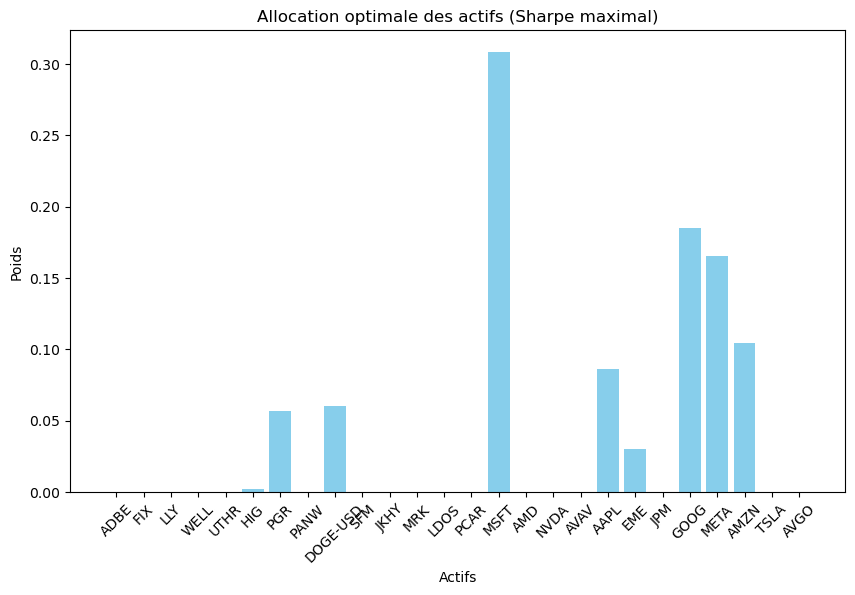

In [14]:
#Voici une implémentation du modèle d'optimisation de portefeuille de Markowitz en Python pour nos 26 actions. 
# Ce modèle vise à maximiser le rendement attendu pour un niveau donné de risque 
#(ou minimiser le risque pour un rendement attendu).

# Étapes du Modèle de Markowitz :
# 1- Récupérer les données historiques des prix des actions.
# 2- Calculer les rendements quotidiens.
# 3- Estimer la moyenne des rendements et la matrice de covariance.
# 4- Résoudre le problème d'optimisation avec scipy.optimize.

import numpy as np  
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Liste des actions
tickers = ["ADBE", "FIX", "LLY", "WELL", "UTHR", "HIG", "PGR", "PANW", "DOGE-USD", "SFM",
           "JKHY", "MRK", "LDOS", "PCAR", "MSFT", "AMD", "NVDA", "AVAV", "AAPL", "EME",
           "JPM", "GOOG", "META", "AMZN", "TSLA", "AVGO"]

# 1. Télécharger les données de prix historiques
data = yf.download(tickers, start="2000-01-01", end="2025-01-01")["Close"]

# 2. Calcul des rendements quotidiens
returns = data.pct_change().dropna()

# 3. Moyenne des rendements et matrice de covariance
mean_returns = returns.mean()
cov_matrix = returns.cov()

# 4. Fonctions pour l'optimisation
def portfolio_performance(weights, mean_returns, cov_matrix):
    """Calcule le rendement et le risque d'un portefeuille."""
    portfolio_return = np.sum(weights * mean_returns) * 252  # Rendement annuel
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Risque annuel
    return portfolio_return, portfolio_risk

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    """Fonction objectif pour maximiser le ratio de Sharpe."""
    portfolio_return, portfolio_risk = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return -sharpe_ratio  # Minimise la valeur négative du ratio de Sharpe

def portfolio_variance(weights, cov_matrix):
    """Minimise la variance (pour un portefeuille à risque minimal)."""
    return np.dot(weights.T, np.dot(cov_matrix * 252, weights))

# Contraintes et bornes
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # La somme des poids = 1
bounds = tuple((0, 1) for _ in range(num_assets))  # Chaque poids entre 0 et 1

# Initialisation des poids
init_guess = num_assets * [1. / num_assets]

# 5. Optimisation pour minimiser le risque
optimal_risk = minimize(portfolio_variance, init_guess, args=(cov_matrix,),
                        method='SLSQP', bounds=bounds, constraints=constraints)

# 6. Optimisation pour maximiser le ratio de Sharpe
optimal_sharpe = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# 7. Résultats optimaux
weights_risk = optimal_risk.x
weights_sharpe = optimal_sharpe.x

# 8. Afficher les résultats
portfolio_return_risk, portfolio_risk_risk = portfolio_performance(weights_risk, mean_returns, cov_matrix)
portfolio_return_sharpe, portfolio_risk_sharpe = portfolio_performance(weights_sharpe, mean_returns, cov_matrix)

print("Portefeuille à risque minimal :")
print("Poids :", weights_risk)
print(f"Rendement attendu : {portfolio_return_risk:.2%}, Risque : {portfolio_risk_risk:.2%}")

print("\nPortefeuille au ratio de Sharpe maximal :")
print("Poids :", weights_sharpe)
print(f"Rendement attendu : {portfolio_return_sharpe:.2%}, Risque : {portfolio_risk_sharpe:.2%}")

# 9. Visualisation des allocations
plt.figure(figsize=(10, 6))
plt.bar(tickers, weights_sharpe, color='skyblue')
plt.title("Allocation optimale des actifs (Sharpe maximal)")
plt.xlabel("Actifs")
plt.ylabel("Poids")
plt.xticks(rotation=45)
plt.show()


In [94]:
# Utilisation d'une classe :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

class MarkowitzPortfolio:
    def __init__(self, returns):
        """
        Initialise la classe avec les rendements des actifs.

        :param returns: DataFrame des rendements des actifs (lignes = dates, colonnes = actifs)
        """
        self.returns = returns
        self.mean_returns = returns.mean()
        self.cov_matrix = returns.cov()
        self.num_assets = len(self.mean_returns)

    def portfolio_performance(self, weights, annualize = True):
        """
        Calcule le rendement attendu et la volatilité d'un portefeuille donné.

        :param weights: Liste des poids des actifs dans le portefeuille
        :return: Tuple (rendement attendu, volatilité, ratio de Sharpe)
        """
        returns = np.dot(weights, self.mean_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(self.cov_matrix, weights)))
        sharpe_ratio = returns / volatility

        if annualize:
            returns *= 252
            volatility *= np.sqrt(252)
        
        return returns, volatility, sharpe_ratio

    def minimize_risk(self):
        """Optimise le portefeuille pour minimiser le risque (variance)."""
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0, 1) for _ in range(self.num_assets))
        result = sco.minimize(lambda x: self.portfolio_performance(x)[1],
                              self.num_assets * [1. / self.num_assets], 
                              method='SLSQP',
                              bounds=bounds,
                              constraints=constraints)
        return result

    def maximize_sharpe_ratio(self, risk_free_rate=0):
        """Optimise le portefeuille pour maximiser le ratio de Sharpe."""
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0, 1) for _ in range(self.num_assets))
        result = sco.minimize(lambda x: -(self.portfolio_performance(x)[0] - risk_free_rate) /
                                       self.portfolio_performance(x)[1],
                              self.num_assets * [1. / self.num_assets], 
                              method='SLSQP',
                              bounds=bounds,
                              constraints=constraints)
        return result

    def efficient_frontier(self, target_returns):
        """
        Génère la frontière efficiente en minimisant le risque pour un ensemble de rendements cibles.

        :param target_returns: Liste de rendements cibles
        :return: Tuple (volatilities, weights)
        """
        volatilities = []
        weights_list = []
        for target in target_returns:
            constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                           {'type': 'eq', 'fun': lambda x: np.dot(x, self.mean_returns) - target})
            bounds = tuple((0, 1) for _ in range(self.num_assets))
            result = sco.minimize(lambda x: self.portfolio_performance(x)[1],
                                  self.num_assets * [1. / self.num_assets],
                                  method='SLSQP',
                                  bounds=bounds,
                                  constraints=constraints)
            volatilities.append(result['fun'])
            weights_list.append(result['x'])
        return volatilities, weights_list

    def plot_efficient_frontier(self, points=50, risk_free_rate=0):
        """
        Trace deux graphiques de la frontière efficiente et les portefeuilles optimaux :
        - Risque minimal
        - Ratio de Sharpe maximal

        :param points: Nombre de points à inclure sur la frontière efficiente
        :param risk_free_rate: Taux sans risque utilisé pour le ratio de Sharpe
        """
        target_returns = np.linspace(self.mean_returns.min(), self.mean_returns.max(), points)
        volatilities, _ = self.efficient_frontier(target_returns)

        # Optimisations spécifiques
        min_risk_result = self.minimize_risk()
        max_sharpe_result = self.maximize_sharpe_ratio(risk_free_rate)

        # Graphique 1 : Risque minimal
        plt.figure(figsize=(10, 7))
        plt.plot(volatilities, target_returns, label='Frontière efficiente', linestyle='--')
        #plt.scatter(*self.portfolio_performance(min_risk_result['x'])[:2], color='red', label='Risque minimal')
        plt.title('Frontière efficiente - Risque minimal')
        plt.xlabel('Volatilité (Risque)')
        plt.ylabel('Rendement attendu')
        plt.legend()
        plt.grid()
        plt.show()

        # Graphique 2 : Ratio de Sharpe maximal
        plt.figure(figsize=(10, 7))
        plt.plot(volatilities, target_returns, label='Frontière efficiente', linestyle='--')
        #plt.scatter(*self.portfolio_performance(max_sharpe_result['x'])[:2], color='green', label='Sharpe maximal')
        plt.title('Frontière efficiente - Sharpe maximal')
        plt.xlabel('Volatilité (Risque)')
        plt.ylabel('Rendement attendu')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_mean_returns_and_covariance(self):
        """
        Trace les graphiques des rendements moyens et de la matrice de covariance.
        """
        # Graphique des rendements moyens
        plt.figure(figsize=(10, 7))
        self.mean_returns.sort_values().plot(kind='bar', color='skyblue')
        plt.title('Rendements moyens par actif')
        plt.ylabel('Rendement moyen')
        plt.grid()
        plt.show()

        # Graphique de la matrice de covariance
        plt.figure(figsize=(10, 7))
        plt.imshow(self.cov_matrix, cmap='viridis', interpolation='none')
        plt.colorbar(label='Covariance')
        plt.title('Matrice de covariance des actifs')
        plt.xlabel('Actifs')
        plt.ylabel('Actifs')
        plt.show()

    def plot_returns_over_time(self):
        """
        Trace l'évolution des rendements en fonction du temps.
        """
        plt.figure(figsize=(12, 8))
        self.returns.cumsum().plot()
        plt.title('Évolution des rendements cumulés dans le temps')
        plt.xlabel('Temps')
        plt.ylabel('Rendements cumulés')
        plt.grid()
        plt.show()

    def plot_closing_prices_by_year(self, data):
        """
        Trace l'évolution des prix de clôture des actifs par année.

        :param data: DataFrame des prix de clôture ajustés (Adj Close)
        """
        annual_prices = data.resample('Y').last()
        plt.figure(figsize=(12, 8))
        annual_prices.plot()
        plt.title('Évolution des prix de clôture par année')
        plt.xlabel('Année')
        plt.ylabel('Prix de clôture')
        plt.grid()
        plt.show()

    def plot_allocation(self, weights, title):
        """
        Trace un graphique à barres pour les allocations du portefeuille.

        :param weights: Liste des poids des actifs dans le portefeuille
        :param title: Titre du graphique
        """
        plt.figure(figsize=(12, 8))
        allocations = pd.Series(weights, index=self.mean_returns.index)
        allocations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
        plt.title(title)
        plt.ylabel('Poids')
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

    def plot_min_risk_allocation(self):
        """
        Trace un graphique des allocations pour le portefeuille à risque minimal.
        """
        min_risk_result = self.minimize_risk()
        self.plot_allocation(min_risk_result['x'], 'Allocation du portefeuille à risque minimal')

    def plot_max_sharpe_allocation(self, risk_free_rate=0):
        """
        Trace un graphique des allocations pour le portefeuille au ratio de Sharpe maximal.

        :param risk_free_rate: Taux sans risque utilisé pour le ratio de Sharpe
        """
        max_sharpe_result = self.maximize_sharpe_ratio(risk_free_rate)
        self.plot_allocation(max_sharpe_result['x'], 'Allocation du portefeuille au ratio de Sharpe maximal')





C:\Users\achil\AppData\Local\Temp\ipykernel_28148\113963570.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


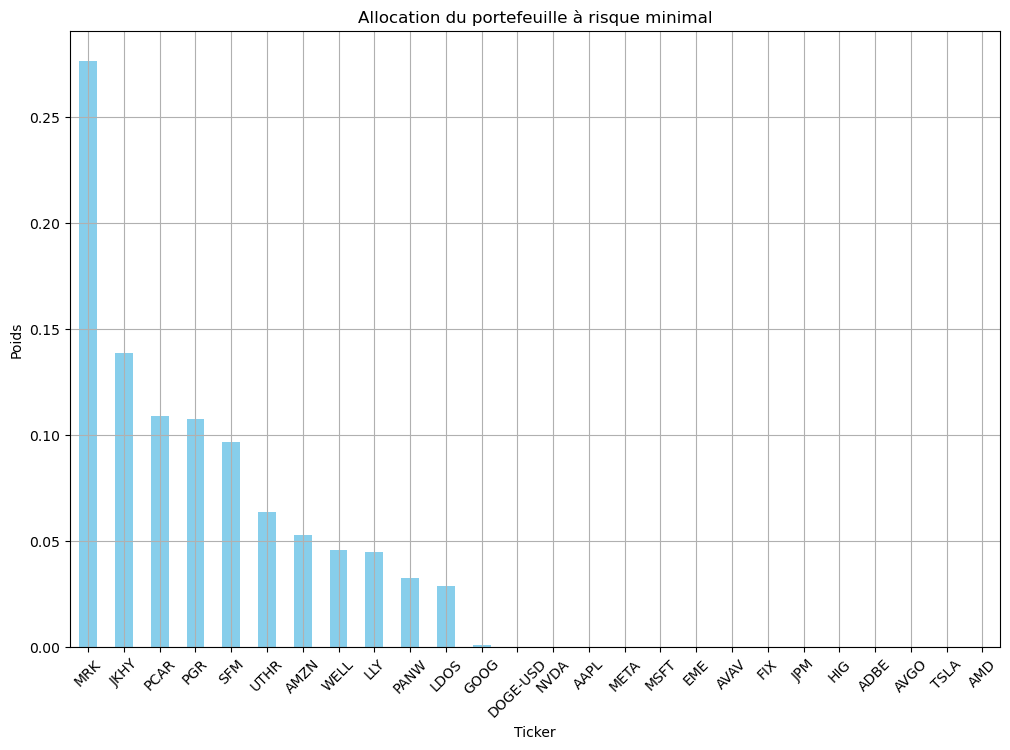

In [96]:
# Exemple d'utilisation
returns = data.pct_change().dropna()
portfolio = MarkowitzPortfolio(returns)
portfolio.plot_min_risk_allocation()
# portfolio.plot_efficient_frontier(risk_free_rate=0.02)
# portfolio.plot_mean_returns_and_covariance()
# portfolio.plot_returns_over_time()
# portfolio.plot_closing_prices_by_year(data)

<Figure size 1200x800 with 0 Axes>

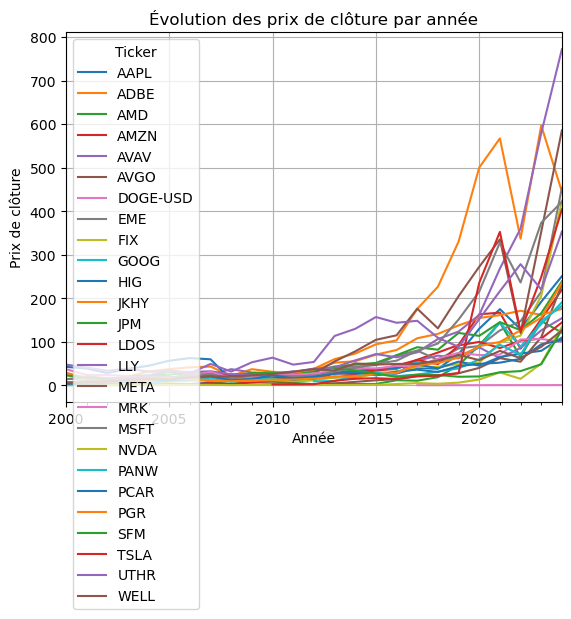

In [106]:
portfolio.plot_closing_prices_by_year(data)

<Figure size 1200x800 with 0 Axes>

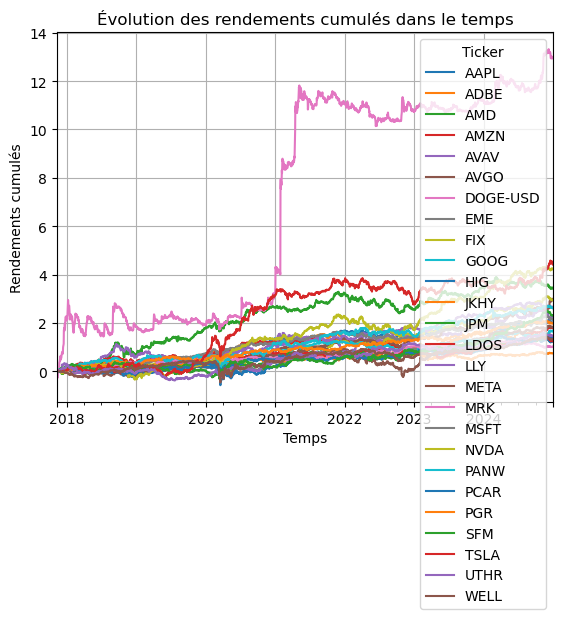

In [40]:
portfolio.plot_returns_over_time()

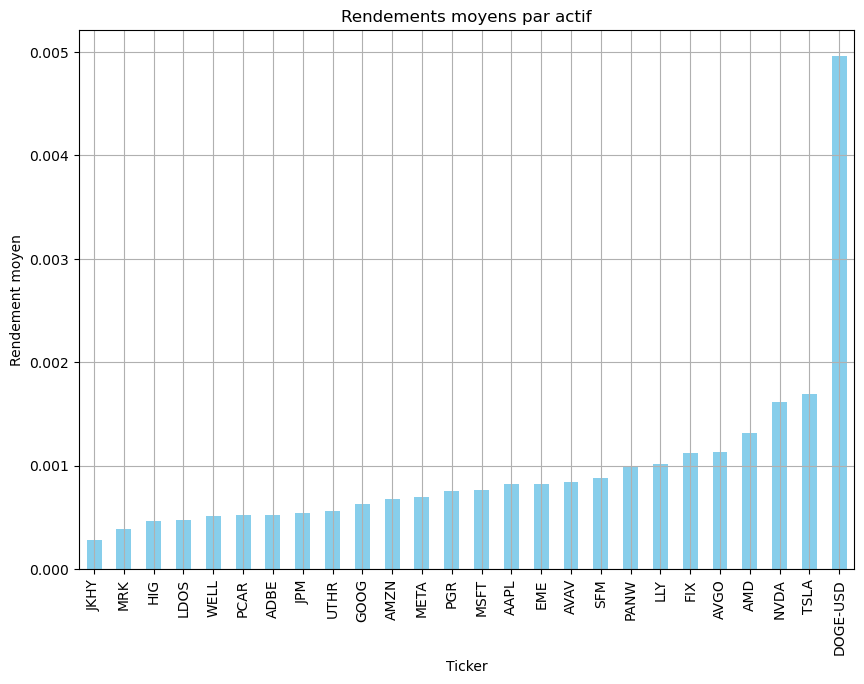

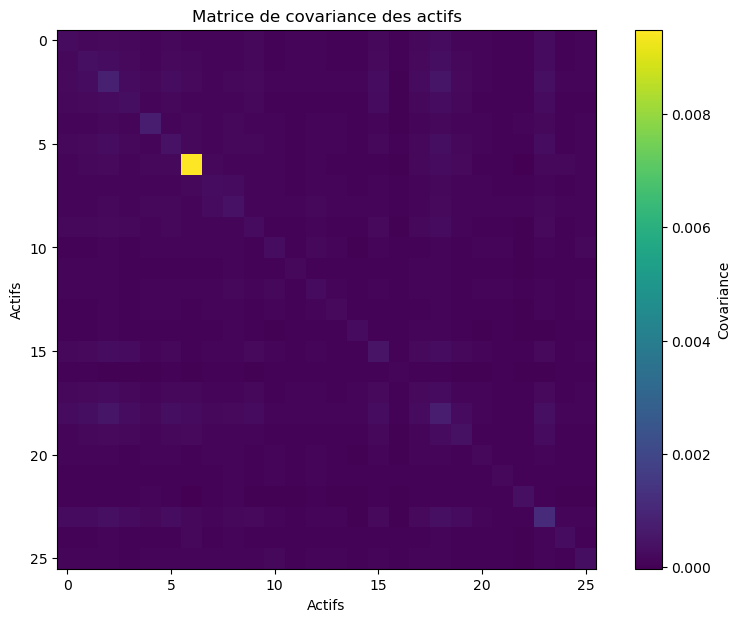

In [104]:
portfolio.plot_mean_returns_and_covariance()

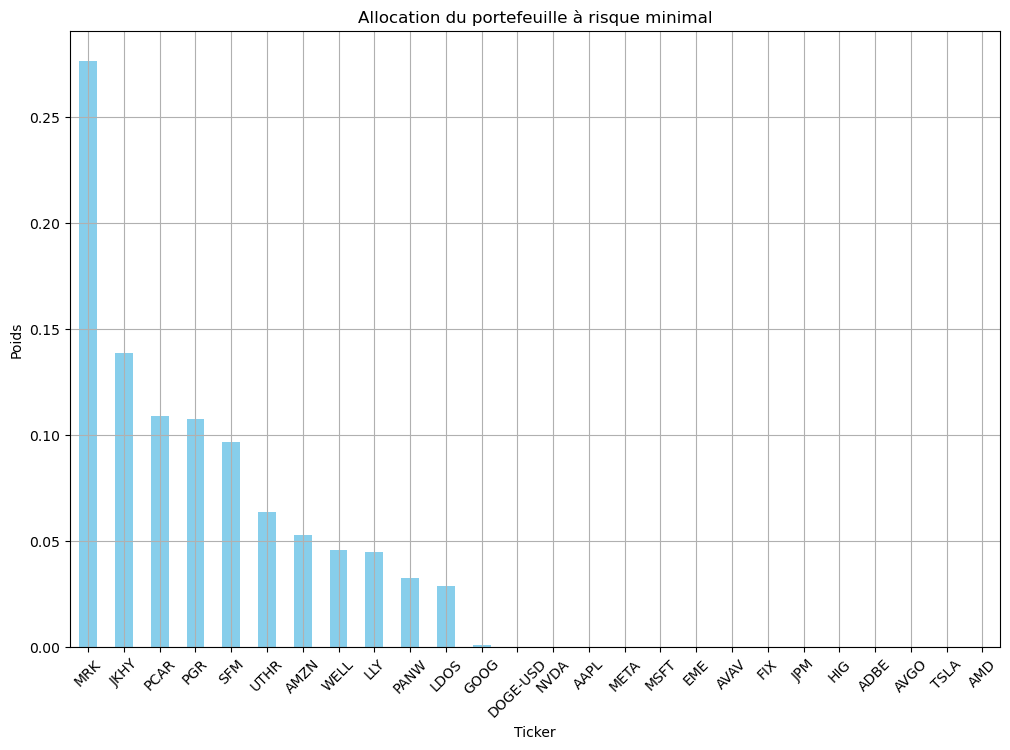

In [102]:
portfolio.plot_min_risk_allocation()

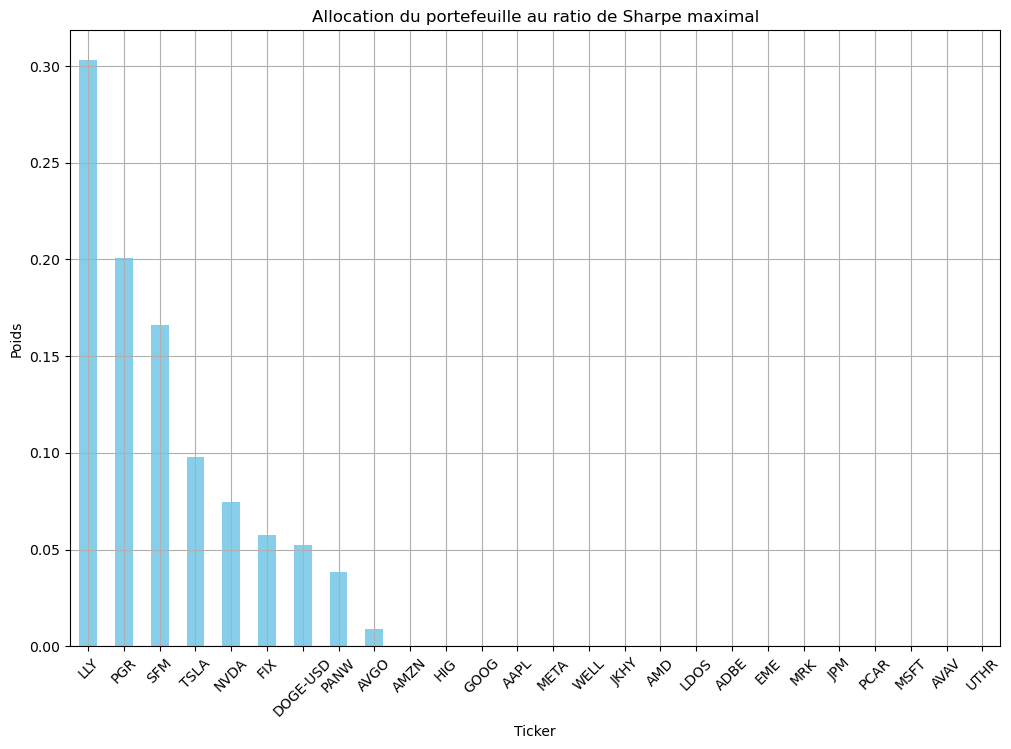

In [100]:
portfolio.plot_max_sharpe_allocation(risk_free_rate=0)